# **Mulit-layer Perceptron**

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import seaborn as sns

In [68]:

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])


Epoch 1/100
7/7 [==============================] - 2s 3ms/step - loss: 11.2382 - mae: 2.9955
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 9.0790 - mae: 2.6385
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 7.2335 - mae: 2.2881
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 5.6457 - mae: 1.9614
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 4.3546 - mae: 1.6524
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 3.2508 - mae: 1.3681
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 2.3933 - mae: 1.1328
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9264 - mae: 1.0004
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 1.6496 - mae: 0.9387
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 1.5287 - mae: 0.9209
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 1.4200

In [71]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

1.1360434293746948

In [72]:
# Plotting the training and testing loss

import matplotlib.pyplot as plt

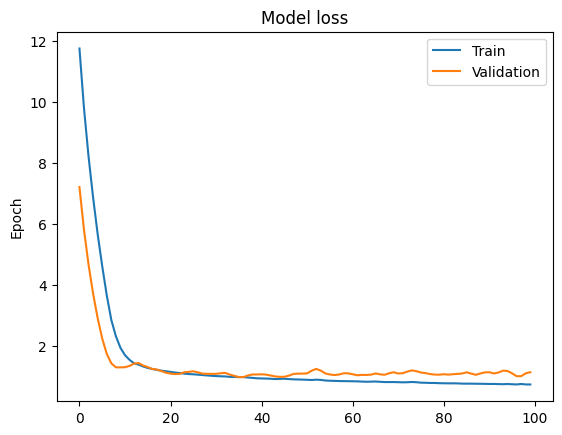

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Early Stopping of Epochs

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
# Building the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation ='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation ='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback fundtion
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Evaluation the odel (uig Mean Squard Error )

loss = model.evaluate(X_test, y_test, verbose=0)
loss



Epoch 1/100
7/7 [==============================] - 2s 65ms/step - loss: 8.2487 - val_loss: 4.4953
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 6.2644 - val_loss: 3.1818
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 4.4849 - val_loss: 2.1652
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 3.0954 - val_loss: 1.5278
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 2.0663 - val_loss: 1.3342
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 1.5077 - val_loss: 1.4407
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 1.3712 - val_loss: 1.5958
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 1.3782 - val_loss: 1.5906
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 1.3248 - val_loss: 1.4596
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 1.2703 - val_loss: 1.3439


1.343875527381897

In [80]:
# Plotting the traing and testing loss

import matplotlib.pyplot as plt

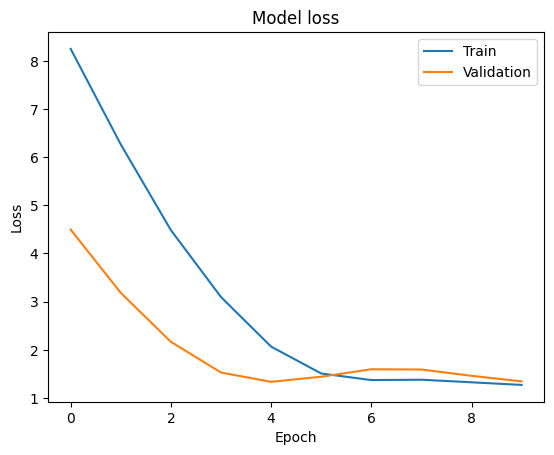

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()